# Natural Language Processing - Basics

#### Import resources

In [2]:
import nltk
import urllib.request
from bs4 import BeautifulSoup

#### Import an HTML web page

In [3]:
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Natural language processing - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":882245483,"wgRevisionId":882245483,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All accuracy disputes","Articles with disputed statements from June 2018","Wikipedia articles with LCCN identifiers","Wikipedia articles with NDL identifiers","Natural language processing","Computational linguistics","Speech recognition","Co

#### BeautifulSoup to clean the webpage text of HTML tags

In [5]:
b_soup = BeautifulSoup(html,'html5lib')
text = b_soup.get_text(strip = True)
print(text)

Natural language processing - Wikipediadocument.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":882245483,"wgRevisionId":882245483,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All accuracy disputes","Articles with disputed statements from June 2018","Wikipedia articles with LCCN identifiers","Wikipedia articles with NDL identifiers","Natural language processing","Computational linguistics","Speech recognition","Computational fields of study","Artificial intelligence"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSepa

#### Now we have clean text from the crawled web page, let’s convert the text into tokens

Tokenization example

In [7]:
text_2 = "Good afternoon Mr. Doug, how are you? I hope everything is going well. I will call you soon, best regards."
print("sentence =", nltk.tokenize.sent_tokenize(text_2))
print("word =", nltk.tokenize.word_tokenize(text_2))

sentence = ['Good afternoon Mr. Doug, how are you?', 'I hope everything is going well.', 'I will call you soon, best regards.']
word = ['Good', 'afternoon', 'Mr.', 'Doug', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'I', 'will', 'call', 'you', 'soon', ',', 'best', 'regards', '.']


Other languages

In [10]:
text_fr = "Bonjour M. Doug, comment allez-vous? J'espère que tout va bien. Je vous contacterai prochainement, cordialement."
print("Fr =", nltk.tokenize.sent_tokenize(text_fr,"french"))

Fr = ['Bonjour M. Doug, comment allez-vous?', "J'espère que tout va bien.", 'Je vous contacterai prochainement, cordialement.']


Back to our main example

In [11]:
tokens = [t for t in text.split()]
print(tokens)

['Natural', 'language', 'processing', '-', 'Wikipediadocument.documentElement.className', '=', 'document.documentElement.className.replace(', '/(^|\\s)client-nojs(\\s|$)/,', '"$1client-js$2"', ');(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural', 'language', 'processing","wgCurRevisionId":882245483,"wgRevisionId":882245483,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive', 'template', 'wayback', 'links","All', 'accuracy', 'disputes","Articles', 'with', 'disputed', 'statements', 'from', 'June', '2018","Wikipedia', 'articles', 'with', 'LCCN', 'identifiers","Wikipedia', 'articles', 'with', 'NDL', 'identifiers","Natural', 'language', 'processing","Computational', 'linguistics","Speech', 'recognition","Computational', 'fields', 'of', 'study","A

#### Words frequencies

In [14]:
sr= nltk.corpus.stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in nltk.corpus.stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

Natural:8
language:55
processing:13
-:1
Wikipediadocument.documentElement.className:1
=:1
document.documentElement.className.replace(:1
/(^|\s)client-nojs(\s|$)/,:1
"$1client-js$2":1
);(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural:1
processing","wgCurRevisionId":882245483,"wgRevisionId":882245483,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive:1
template:2
wayback:2
links","All:1
accuracy:2
disputes","Articles:1
disputed:2
statements:2
June:2
2018","Wikipedia:1
articles:5
LCCN:2
identifiers","Wikipedia:1
NDL:2
identifiers","Natural:1
processing","Computational:1
linguistics","Speech:1
recognition","Computational:1
fields:2
study","Artificial:1
intelligence"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikit

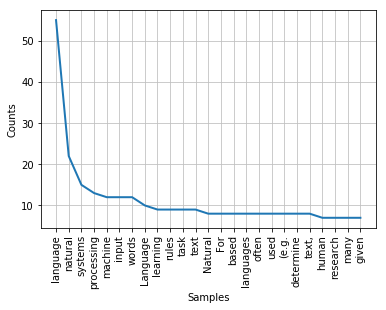

In [20]:
freq.plot(25)

### Stop words

Text may contain stop words like ‘the’, ‘is’, ‘are’. Stop words can be filtered from the text to be processed. 

There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words.